In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("D:/TF-OPENPOSE/Image classification/natural_images"))


['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:

from fastai import *
from fastai.vision import *

In [4]:
import split_folders


split_folders.ratio('D:/TF-OPENPOSE/Image classification/natural_images', output="output", seed=1337, ratio=(.8, .1, .1)) # default values


In [5]:
print(os.listdir("output"))

['test', 'train', 'val']


In [11]:
PATH = "output/"
PATH_OLD = "output/"
TMP_PATH = "/tmp/tmp"
MODEL_PATH = "/tmp/model/"
sz=150

In [7]:
# GPU required
torch.cuda.is_available()

True

In [8]:
torch.backends.cudnn.enabled

True

In [12]:
os.listdir(PATH + 'train')

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [13]:
# Fix to enable Resnet to live on Kaggle
cache_dir = os.path.expanduser(os.path.join('~', '.torch'))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
models_dir = os.path.join(cache_dir, 'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [14]:
#arch=resnet34
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(PATH, train='train', valid='val',test='test', ds_tfms=tfms, size=sz, num_workers=0)

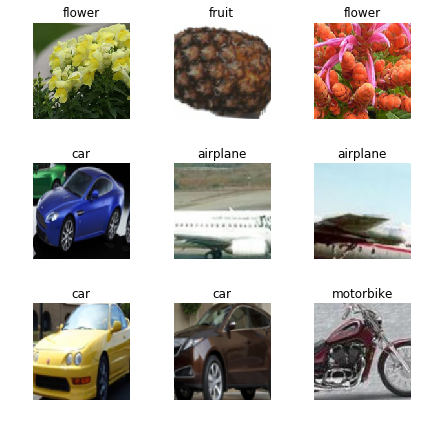

In [15]:
data.show_batch(rows=3, figsize=(6,6))

In [16]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir=MODEL_PATH)


epoch,train_loss,valid_loss,accuracy
1,0.593925,0.093232,0.981050
2,0.188759,0.046720,0.989796
3,0.094605,0.038025,0.991254
4,0.068299,0.036575,0.991254
5,0.061126,0.033322,0.989796
6,0.055752,0.032822,0.991254


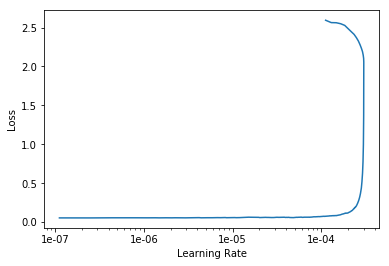

In [17]:
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)
learn.recorder.plot()

This is it!!

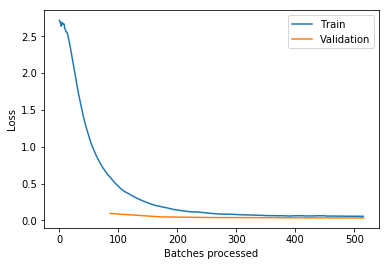

In [18]:
learn.recorder.plot_losses()

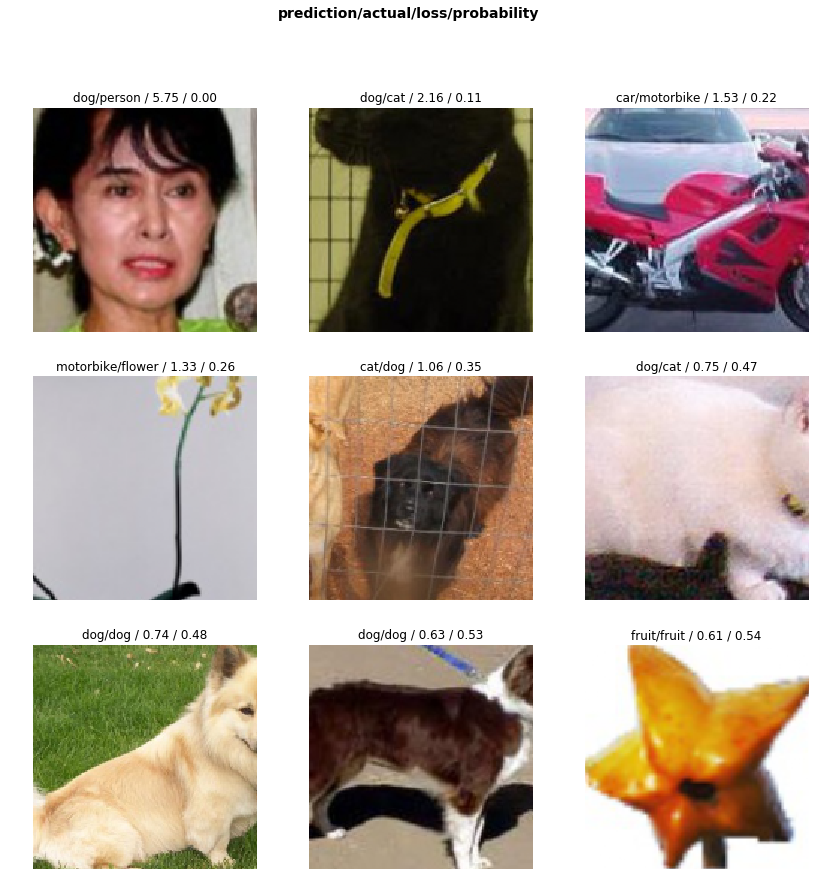

In [19]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)
interp.plot_top_losses(9, figsize=(14,14))

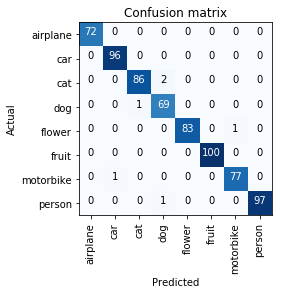

In [20]:
interp.plot_confusion_matrix()

In [21]:
interp.most_confused(slice_size=10)

[('cat', 'dog', 2)]